**Importing libraries**

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

**Importing the dataset via Keras Api**

In [288]:
df= keras.datasets.mnist.load_data()

**Splitting dataset into train and test**

In [289]:
(X_train,y_train),(X_test,y_test)=df

##**Exploratory data analysis**

In [290]:
print("Number of images in train dataset",len(X_train))
print("Number of images in test dataset",len(X_test))

Number of images in train dataset 60000
Number of images in test dataset 10000


In [291]:
print("Shape of each image in pixels",X_train[0].shape)

Shape of each image in pixels (28, 28)


In [292]:
label=pd.Series(y_train) 

**Displaying digits from MNIST dataset**

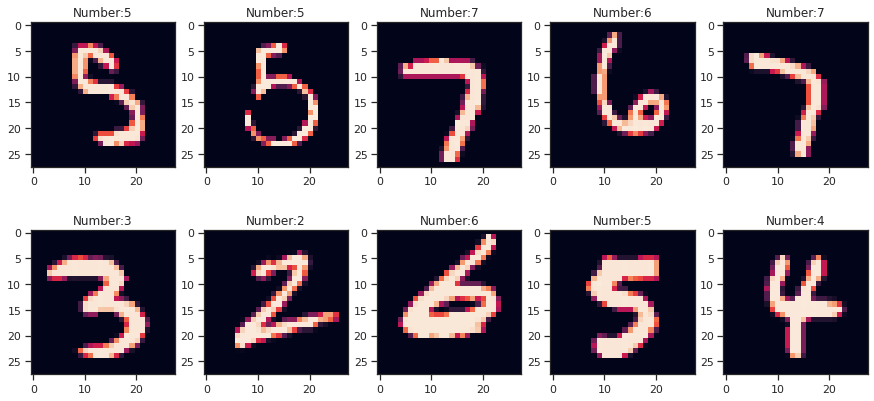

In [293]:
import random
fig,ax=plt.subplots(2,5,figsize=(15,7))
ax=ax.flatten()
for i in range(10):
    z=random.randint(0,60000)
    show=X_train[z].reshape(28,28)
    ax[i].imshow(show)
    ax[i].set(title=f"Number:{y_train[z]}");

**Total number of each digit**

In [294]:
k=label.value_counts().sort_index()
df_new=pd.DataFrame(k,columns=['Number of Digits'])
df_new

,Number of Digits
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


**Barplot showing the number of each digit**

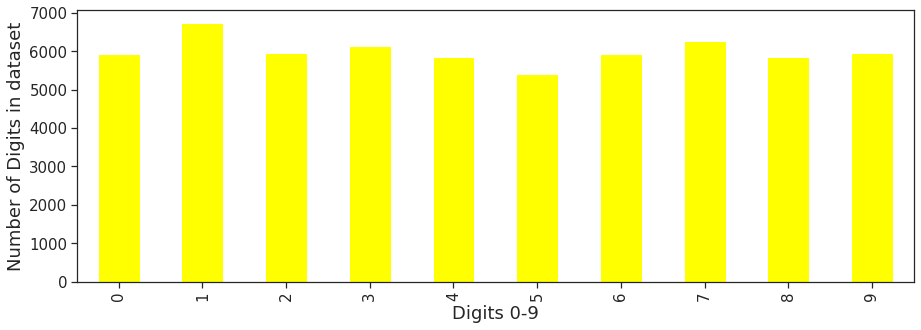

In [295]:
k.plot(kind='bar',color="yellow",figsize=(15,5),fontsize=15)
plt.xlabel("Digits 0-9",fontsize=18)
plt.ylabel("Number of Digits in dataset",fontsize=18)
plt.show()

**Pie plot**

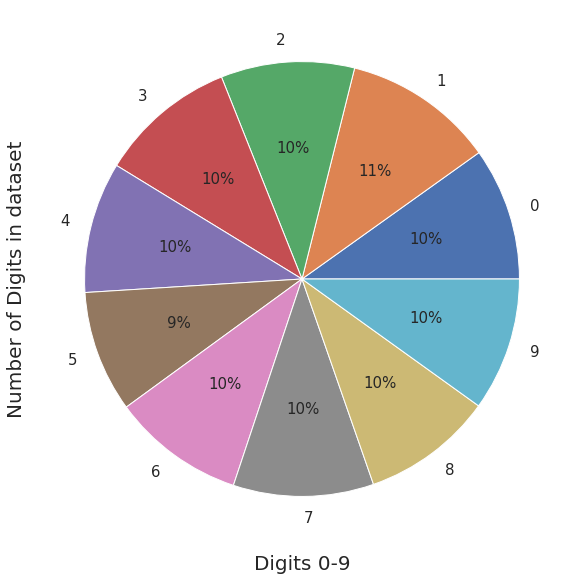

In [296]:
k.plot(kind='pie',figsize=(30,10),fontsize=15,autopct='%1.0f%%')
plt.xlabel("Digits 0-9",fontsize=20)
plt.ylabel("Number of Digits in dataset",fontsize=20)
plt.show()

In [297]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Number of Digits  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


In [298]:
df_new.describe()

,Number of Digits
count,10.000000
mean,6000.000000
std,339.505196
min,5421.000000
25%,5867.750000
50%,5936.000000
75%,6087.750000
max,6742.000000


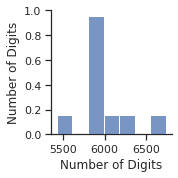

In [299]:
sns.set(style="ticks",color_codes=True,)
sns.pairplot(df_new)

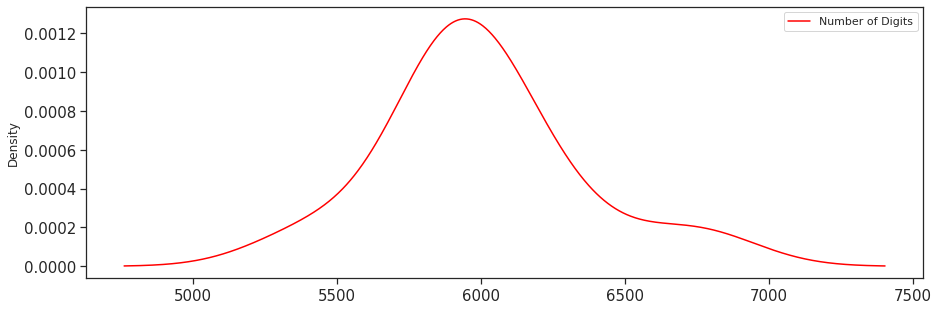

In [300]:
ax=df_new.plot.kde(color="red",figsize=(15,5),fontsize=15)

#**Structure of a Convolutional Neural Network**


#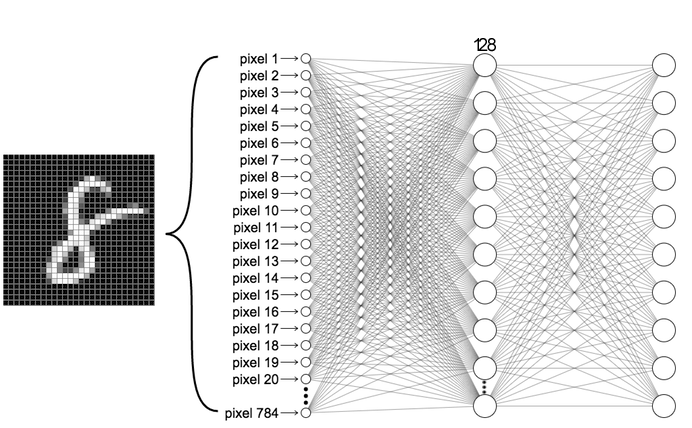

#Preprocessing the data

In [301]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
#Normalizing the data so that all the pixels in image are on same scale 
X_train=X_train/255.0
X_test=X_test/255.0
#The value of data in each pixel is between 0 and 1 after normalizing

#Defining a callback function

In [302]:
#Implementing a callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9999):
      print("\n Reached 99.99% accuracy so cancelling training")
      self.model.stop_training=True

#Building a **CNN**

In [303]:
from tensorflow.keras.layers import BatchNormalization
callbacks=myCallback()
model=tf.keras.models.Sequential([
  #1st Layer
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),#MaxPooling function calculates the maximum value in each patch of each feature map.
  BatchNormalization(axis=-1),#Normalize the inputs of the layer.
  #2nd layer
  tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  BatchNormalization(axis=-1),
  #Flattening the layers
  tf.keras.layers.Flatten(),
  #Dense Layer
  tf.keras.layers.Dense(128,activation='relu'),
  BatchNormalization(axis=-1),
  #Output Layer
  tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()#Showing the model summary

##NOTEs for understanding working :-
#Relu function is a linear function that will output the input directly if it is positive else it will output zero.
#Using relu activation function in the hidden layers as it makes the model easier to train and often achieves better performance.

#Softmax function is a function in which the unit with the largest input has output +1 while all other units have output 0.
#Using softmax activation function in the output layer helps in predicting a multinomial probability distribution(0,1,2,3...9),multiclass classification.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 5, 5, 128)         512       
_________________________________________________________________
flatten_9 (Flatten)          (None, 3200)             

#Compiling the model

In [304]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=15,callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0915 - accuracy: 0.9719
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9867
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0141 - accuracy: 0.9953
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

#Printing the accuracy of model

In [305]:
loss,acc=model.evaluate(X_train,y_train)
print("The train accuracy of model is :-",acc*100)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9996
The train accuracy of model is :- 99.95666742324829


In [306]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("The test accuracy of model is :-",test_acc*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9939
The test accuracy of model is :- 99.39000010490417


#Plotting the accuracy and loss of model

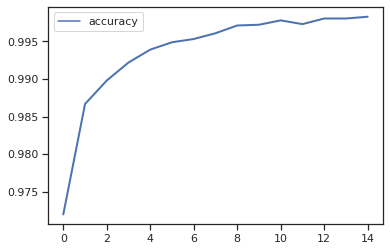

In [307]:
df_hist=pd.DataFrame(history.history)
sns.lineplot(data=df_hist[['accuracy']],linewidth=2);

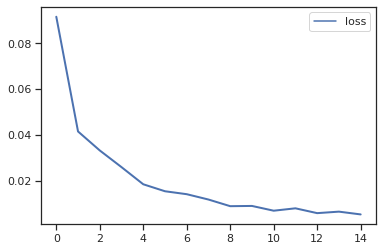

In [308]:
sns.lineplot(data=df_hist[['loss']],linewidth=2);

#**Predicting the digits**

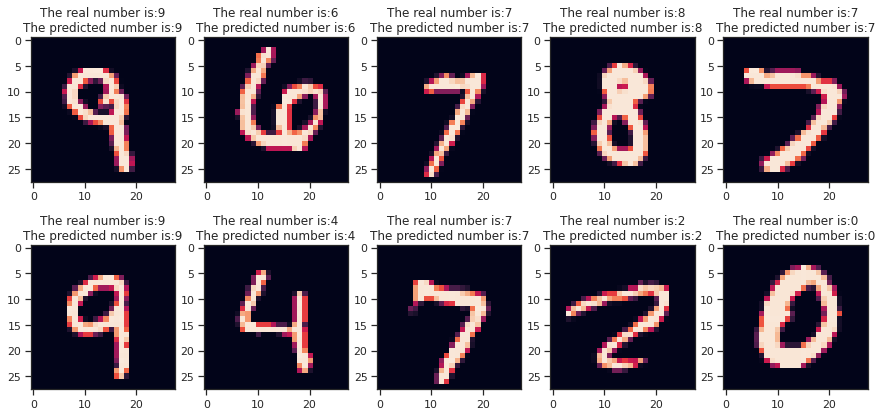

In [309]:
y_pred=model.predict(X_test)
fig,ax=plt.subplots(2,5,figsize=(15,7))
ax=ax.flatten()
for i in range(10):
    z=random.randint(0,10000)
    show=X_test[z].reshape(28,28)
    ax[i].imshow(show)
    ax[i].set(title=f"The real number is:{y_test[z]}\nThe predicted number is:{y_pred[z].argmax()}")

**The test accuracy of the model is 99.39%.**